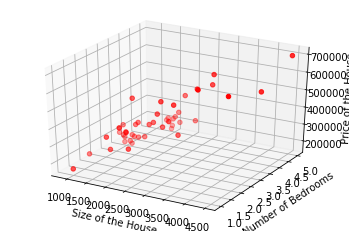

[[215810.61679138]
 [ 61446.18781361]
 [ 20070.13313796]] [[6.42977763e+10]
 [6.30310183e+10]
 [6.17906942e+10]
 [6.05762369e+10]
 [5.93870917e+10]
 [5.82227165e+10]
 [5.70825809e+10]
 [5.59661664e+10]
 [5.48729661e+10]
 [5.38024840e+10]
 [5.27542352e+10]
 [5.17277455e+10]
 [5.07225512e+10]
 [4.97381986e+10]
 [4.87742442e+10]
 [4.78302542e+10]
 [4.69058042e+10]
 [4.60004793e+10]
 [4.51138734e+10]
 [4.42455895e+10]
 [4.33952394e+10]
 [4.25624431e+10]
 [4.17468290e+10]
 [4.09480338e+10]
 [4.01657018e+10]
 [3.93994853e+10]
 [3.86490441e+10]
 [3.79140452e+10]
 [3.71941632e+10]
 [3.64890795e+10]
 [3.57984824e+10]
 [3.51220671e+10]
 [3.44595353e+10]
 [3.38105953e+10]
 [3.31749615e+10]
 [3.25523545e+10]
 [3.19425011e+10]
 [3.13451339e+10]
 [3.07599912e+10]
 [3.01868171e+10]
 [2.96253609e+10]
 [2.90753776e+10]
 [2.85366274e+10]
 [2.80088755e+10]
 [2.74918923e+10]
 [2.69854530e+10]
 [2.64893378e+10]
 [2.60033314e+10]
 [2.55272232e+10]
 [2.50608070e+10]
 [2.46038813e+10]
 [2.41562485e+10]
 [2.37

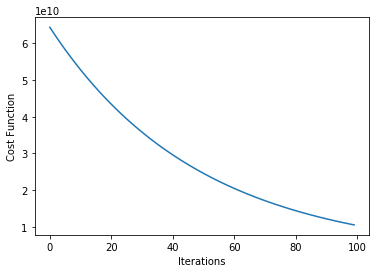

Predicted price of a 1650 sq-ft, 3 br house: 183865.197988


In [7]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace, mean, std, arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import plot, show, xlabel, ylabel

#Evaluate the linear regression

def feature_normalize(X):
    '''
    Returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    '''
    mean_r = []
    std_r = []

    X_norm = X

    n_c = X.shape[1]
    for i in range(n_c):
        m = mean(X[:, i])
        s = std(X[:, i])
        mean_r.append(m)
        std_r.append(s)
        X_norm[:, i] = (X_norm[:, i] - m) / s

    return X_norm, mean_r, std_r


def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta)

    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)

    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta)

        theta_size = theta.size

        for it in range(theta_size):

            temp = X[:, it]
            temp.shape = (m, 1)

            errors_x1 = (predictions - y) * temp

            theta[it][0] = theta[it][0] - alpha * (1.0 / m) * errors_x1.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

#Load the dataset
data = loadtxt('ex1data2.txt', delimiter=',')


#Plot the data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25)]:
    xs = data[:, 0]
    ys = data[:, 1]
    zs = data[:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)
ax.set_xlabel('Size of the House')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price of the House')
plt.show()



X = data[:, :2]
y = data[:, 2]


#number of training samples
m = y.size

y.shape = (m, 1)

#Scale features and set them to zero mean
x, mean_r, std_r = feature_normalize(X)

#Add a column of ones to X (interception data)
it = ones(shape=(m, 3))
it[:, 1:3] = x

#Some gradient descent settings
iterations = 100
alpha = 0.01

#Init Theta and Run Gradient Descent
theta = zeros(shape=(3, 1))

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)
print (theta, J_history)
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()

#Predict price of a 1650 sq-ft 3 br house
price = array([1.0,   ((1650.0 - mean_r[0]) / std_r[0]), ((3 - mean_r[1]) / std_r[1])]).dot(theta)
print ('Predicted price of a 1650 sq-ft, 3 br house: %f' % (price))